# Dendrograma
Visualização hierárquica: Para dados com muitos clusters ou uma estrutura hierárquica, você pode representar a árvore de clusters ou dendrograma para visualizar como os clusters estão relacionados entre si.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn import cluster, datasets

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

In [2]:
# Carregar dados do Excel
data = pd.read_excel('dh fractal.xlsx', sheet_name = "Sheet1")

# Selecionar as colunas relevantes - tabela com os valores de neurito CTL
X = data[['MEAN FOREGROUND PIXELS','Circularity', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 
          'Maximum Span Across Hull', 'Area', 'Perimeter',
           'Mean Radius', 'Diameter of Bounding Circle',
          'Maximum Radius from Circles Centre',
          'Mean Radius from Circles Centre', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']] 
#'Triple points', 'Quadruple points', 'Maximum BL' '⋆D (D with highest r²) for Dʙ' 'Max/Min Radii', 'Junction voxels'
#'Height of Bounding Rectangle''Avarage BL', 'Slab voxels' 'CV for all Radii','CV for all Radii from Circles Centre',
#'Max/Min Radii from Circles Centre','Maximum Radius from Hulls Centre of Mass','Width of Bounding Rectangle',

In [ ]:
# Calcular a variância das colunas

variance = X.var()

# Exibir as variâncias ordenadas
variance_sorted = variance.sort_values(ascending=False)
print(variance_sorted)

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Calcular a matriz de ligação para o dendrograma
sch.dendrogram(sch.linkage(X_normalized, method='ward'))

# Salvar a figura
#plt.savefig('Clustering Hierárquico veiculo vs ata.png')

plt.show()

In [ ]:
# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Calcular a matriz de ligação para o dendrograma
linkage_matrix = hierarchy.linkage(X_normalized, method='ward')

# Definir o limite de cor para os clusters
distance_threshold = 35
color_threshold = 35  # Ajuste conforme necessário

# Plotar o dendrograma com cores para os clusters
dendrogram = hierarchy.dendrogram(linkage_matrix, color_threshold=color_threshold)

plt.show()

# Obter os rótulos dos clusters com base no limite de distância
#cluster_labels = fcluster(linkage_matrix, t=distance_threshold,  criterion='distance')

# Imprimir os rótulos dos clusters
#print(cluster_labels)


## Separar em grupos

In [3]:
# Separar os dados de controle e tratamento
data_Control = data[data['grupo'] == 'Control']
data_H2O2 = data[data['grupo'] == 'H2O2']
data_EtOH = data[data['grupo'] == 'EtOH']
data_DHvehicle = data[data['grupo'] == 'DH vehicle']
data_DH2APB = data[data['grupo'] == 'DH 2-APB']

# Selecionar as colunas relevantes para controle
X_Control = data_Control [['MEAN FOREGROUND PIXELS','Circularity', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 
          'Maximum Span Across Hull', 'Area', 'Perimeter',
           'Mean Radius', 'Diameter of Bounding Circle',
          'Maximum Radius from Circles Centre',
          'Mean Radius from Circles Centre', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']] 

X_H2O2 = data_H2O2 [['MEAN FOREGROUND PIXELS','Circularity', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 
          'Maximum Span Across Hull', 'Area', 'Perimeter',
           'Mean Radius', 'Diameter of Bounding Circle',
          'Maximum Radius from Circles Centre',
          'Mean Radius from Circles Centre', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']] 

X_EtOH = data_EtOH [['MEAN FOREGROUND PIXELS','Circularity', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 
          'Maximum Span Across Hull', 'Area', 'Perimeter',
           'Mean Radius', 'Diameter of Bounding Circle',
          'Maximum Radius from Circles Centre',
          'Mean Radius from Circles Centre', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']] 

X_DHvehicle = data_DHvehicle [['MEAN FOREGROUND PIXELS','Circularity', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 
          'Maximum Span Across Hull', 'Area', 'Perimeter',
           'Mean Radius', 'Diameter of Bounding Circle',
          'Maximum Radius from Circles Centre',
          'Mean Radius from Circles Centre', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']] 

X_DH2APB = data_DH2APB [['MEAN FOREGROUND PIXELS','Circularity', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)', 
          'Maximum Span Across Hull', 'Area', 'Perimeter',
           'Mean Radius', 'Diameter of Bounding Circle',
          'Maximum Radius from Circles Centre',
          'Mean Radius from Circles Centre', '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']] 

In [4]:
# Normalizar os dados para controle...
X_control = StandardScaler().fit_transform(X_Control)

X_h2o2 = StandardScaler().fit_transform(X_H2O2)

X_etoh = StandardScaler().fit_transform(X_EtOH)

X_dhvehicle = StandardScaler().fit_transform(X_DHvehicle)

X_dh2APB = StandardScaler().fit_transform(X_DH2APB)

## Plotar dendrograma - Control

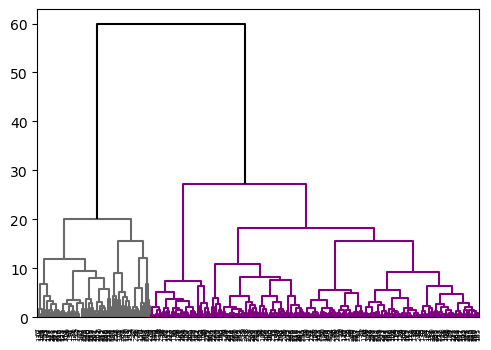

In [12]:
# Definir o tamanho da figura
plt.figure(figsize=(5.7, 4))

# Calcular a matriz de ligação para o dendrograma
linkage_matrix = hierarchy.linkage(X_control, method='ward')

# Definir a paleta de cores personalizada
colors = ['dimgray','purple','darkorange']
hierarchy.set_link_color_palette(colors)

# Plotar o dendrograma com cores para os clusters
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Alterar a cor da primeira linha que liga os clusters principais
plt.gca().get_children()[2].set_color('black')

# Salvar a figura
plt.savefig('dendro_control.tiff', dpi=500)

plt.show()

## Plotar dendrograma - DH vehicle

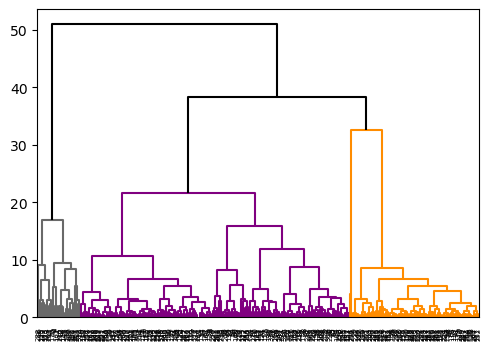

In [11]:
# Definir o tamanho da figura
plt.figure(figsize=(5.7, 4))

# Calcular a matriz de ligação para o dendrograma
linkage_matrix = hierarchy.linkage(X_dhvehicle, method='ward')

# Definir a paleta de cores personalizada
colors = ['dimgray','purple','darkorange'] 
hierarchy.set_link_color_palette(colors)

# Plotar o dendrograma
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Alterar a cor da primeira linha que liga os clusters principais
plt.gca().get_children()[3].set_color('black')

# Salvar a figura
plt.savefig('dendro_dhvehicle.tiff', dpi=500)

plt.show()

## Plotar dendrograma - DH 2APB

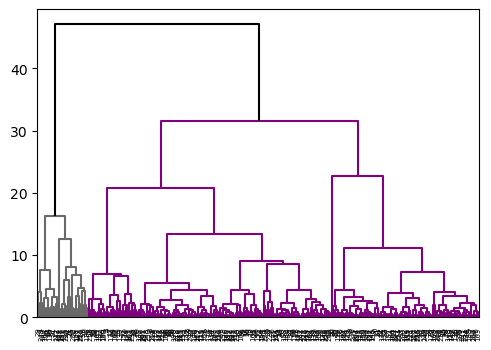

In [10]:
# Definir o tamanho da figura
plt.figure(figsize=(5.7, 4))

# Calcular a matriz de ligação para o dendrograma
linkage_matrix = hierarchy.linkage(X_dh2APB, method='ward')

# Definir a paleta de cores personalizada
colors = ['dimgray','purple','darkorange']
hierarchy.set_link_color_palette(colors)

# Plotar o dendrograma com cores para os clusters
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Alterar a cor da primeira linha que liga os clusters principais
plt.gca().get_children()[2].set_color('black')

# Salvar a figura
#plt.savefig('dendro_dh2apb.tiff', dpi=500)

plt.show()

Exemplo de um dendrograma com threshold,

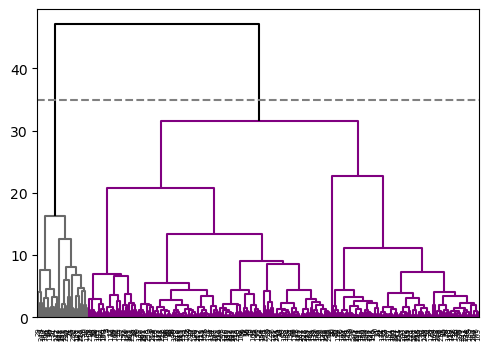

In [9]:
# Definir o tamanho da figura
plt.figure(figsize=(5.7, 4))

# Calcular a matriz de ligação para o dendrograma
linkage_matrix = hierarchy.linkage(X_dh2APB, method='ward')

# Definir o limite de cor para os clusters
distance_threshold = 35
color_threshold = 35  # Ajuste conforme necessário

# Definir a paleta de cores personalizada
colors = ['dimgray','purple','darkorange']
hierarchy.set_link_color_palette(colors)

# Plotar o dendrograma com cores para os clusters
dendrogram = hierarchy.dendrogram(linkage_matrix, color_threshold=color_threshold)

# Alterar a cor da primeira linha que liga os clusters principais
plt.gca().get_children()[2].set_color('black')

# Alterar a cor da linha de corte (linha de fusão)
plt.axhline(y=color_threshold, color='gray', linestyle='--')

# Salvar a figura
#plt.savefig('dendro_dh2apb.tiff', dpi=500)

plt.show()

## Separar os valores em cada cluster correspondente 

In [ ]:
# Carregar dados do Excel
data = pd.read_excel('dh fractal.xlsx', sheet_name="Sheet1")

# Separar os dados por grupo
groups = data['grupo'].unique()

for group in groups:
    # Selecionar os dados do grupo atual
    group_data = data[data['grupo'] == group]
    
    # Selecionar as colunas relevantes
    X = group_data[['MEAN FOREGROUND PIXELS', 'Circularity', 'Density = Foreground Pixels/Hull Area', 'Span Ratio (major/minor axis)',
                    'Maximum Span Across Hull', 'Area', 'Perimeter', 'Mean Radius', 'Diameter of Bounding Circle',
                    'Maximum Radius from Circles Centre', 'Mean Radius from Circles Centre',
                    '87. LACUNARITY for Image (Ｌ) = ∑Λ₍ɢ₎∕Ǥɴ ∀ ɢ∈Ǥ']]
    
    # Normalizar os dados
    X_normalized = StandardScaler().fit_transform(X)
    
    # Calcular a matriz de ligação para o dendrograma
    linkage_matrix = hierarchy.linkage(X_normalized, method='ward')
    
    # Definir o limite de cor para os clusters
    color_threshold = 35  # Ajuste conforme necessário
    
    # Plotar o dendrograma com cores para os clusters
    dendrogram = hierarchy.dendrogram(linkage_matrix, color_threshold=color_threshold)
    
    # Obter os rótulos dos clusters com base no limite de distância
    distance_threshold = 35  # Ajuste conforme necessário
    cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')
    
    # Adicionar os rótulos dos clusters ao DataFrame original
    group_data['Cluster'] = cluster_labels
    
    # Salvar o DataFrame em um arquivo Excel
    #group_data.to_excel(f'clusters_{group}.xlsx', index=False)


## Para deixar salvo

No dendrograma, as cores indicam os clusters formados em diferentes alturas do dendrograma. Cada ramo do dendrograma representa um cluster, e a altura em que dois ramos são unidos indica a distância ou similaridade entre esses clusters.

Para identificar visualmente os clusters formados, você pode observar onde as linhas do dendrograma são cortadas pela linha horizontal definida pelo parâmetro color_threshold. Cada segmento de linha abaixo desse limite representa um cluster separado.

No entanto, se você deseja rotular explicitamente os clusters, precisará utilizar outras técnicas para identificá-los. Uma maneira comum é usar a técnica de corte do dendrograma, onde você traça uma linha horizontal no dendrograma e conta quantas vezes ela intersecta os ramos verticais. Cada interseção representa um cluster.

In [ ]:
# Redução de dimensionalidade com PCA para controle...
pca_Control = PCA(n_components=20)
X_pca_Control = pca_Control.fit_transform(X_Control)

pca_H2O2 = PCA(n_components=20)
X_pca_H2O2 = pca_H2O2.fit_transform(X_H2O2)

pca_EtOH = PCA(n_components=20)
X_pca_EtOH = pca_EtOH.fit_transform(X_EtOH)

pca_DHvehicle = PCA(n_components=20)
X_pca_DHvehicle = pca_DHvehicle.fit_transform(X_DHvehicle)

pca_DH2APB = PCA(n_components=20)
X_pca_DH2APB = pca_DH2APB.fit_transform(X_DH2APB)

# Unir os dados reduzidos de controle e tratamento
X_pca = np.concatenate((X_pca_Control, X_pca_H2O2, X_pca_EtOH, X_pca_DHvehicle, X_pca_DH2APB))

# Definir o tamanho da figura
plt.figure(figsize=(12, 8))

# Calcular a matriz de ligação para o dendrograma
sch.dendrogram(sch.linkage(X_pca, method='ward'))

# Salvar a figura
#plt.savefig('Clustering Hierárquico veiculo vs ata.png')

plt.show()

In [ ]:
'indigo', 'purple', 'orangered','darkorange', 'orange','dimgray', 'slategray'